## Extra Credit
#### DS2003, Due 7 October 2025
*3 points*

**Eleanor Fox**


Improve your graph from last week by incorporating some of the feedback you got in class on Thursday.

Make a notebook that includes the following things:
* your original graph 
* a clear explanation of the feedback, who it came from, and what you have done to address it
* your new graph
  
Export everything in a single html file and submit on Canvas.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

C:\Users\elean\AppData\Local\Temp\ipykernel_2704\921886006.py:57: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\elean\anaconda3\envs\3.12.7-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


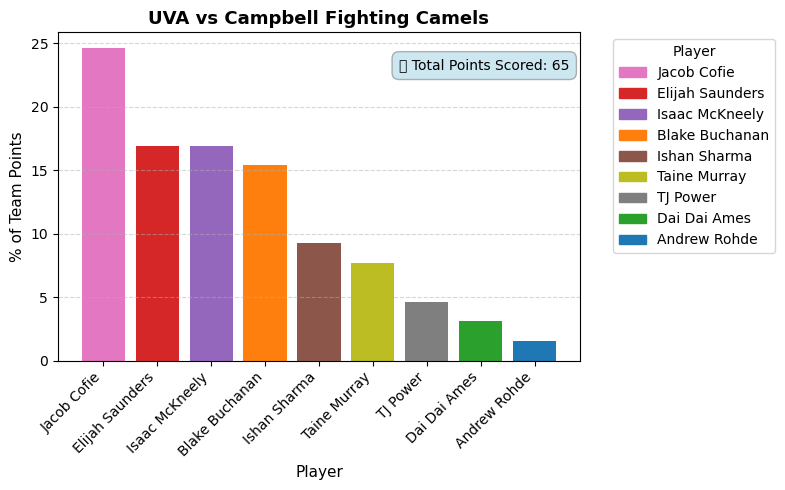

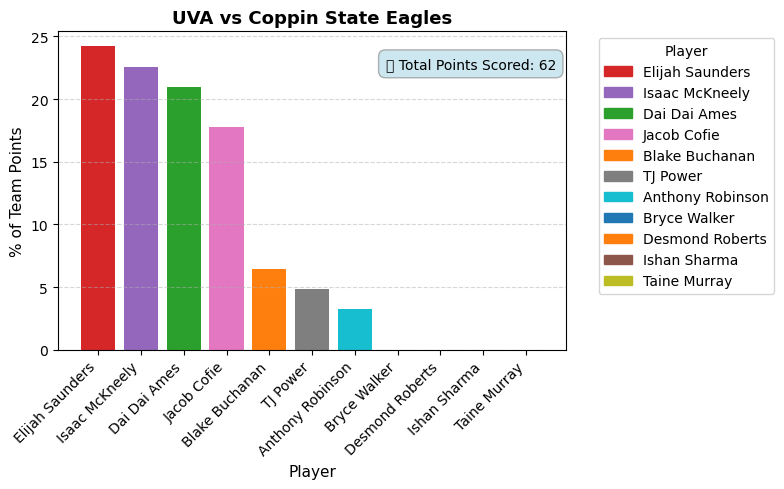

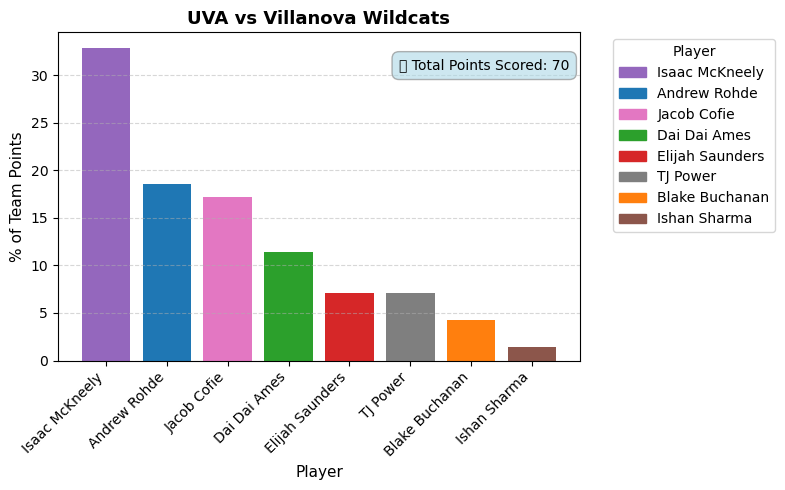

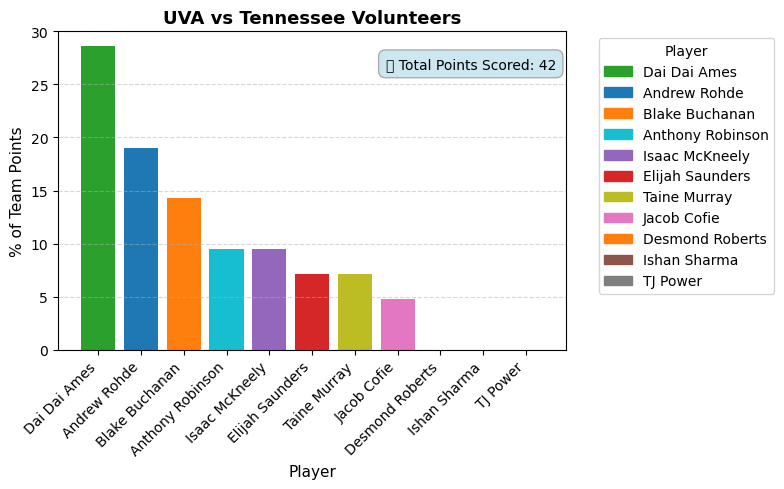

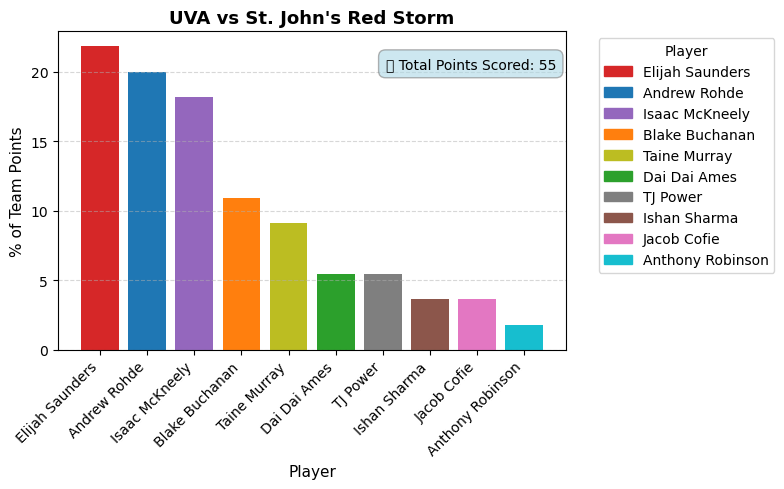

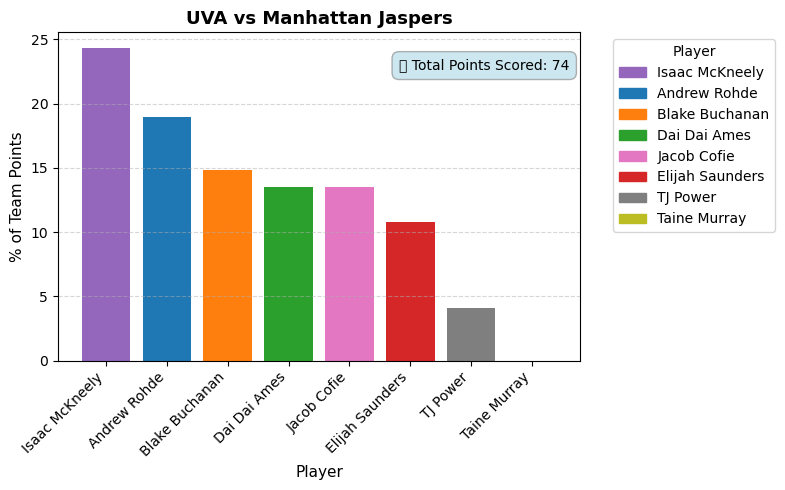

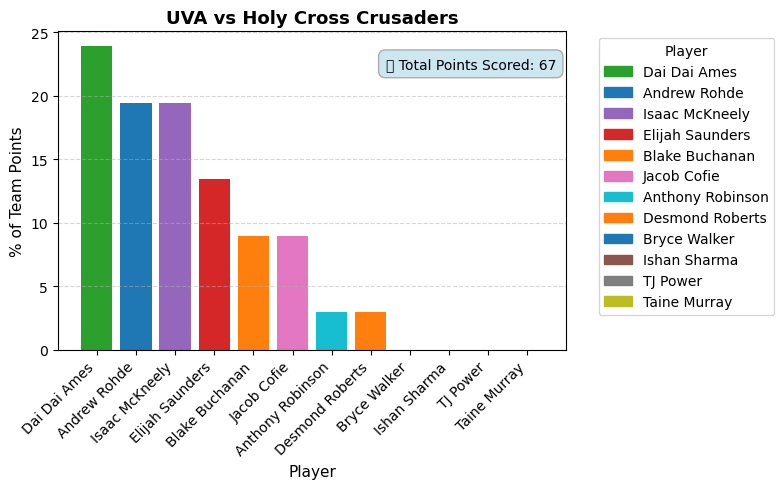

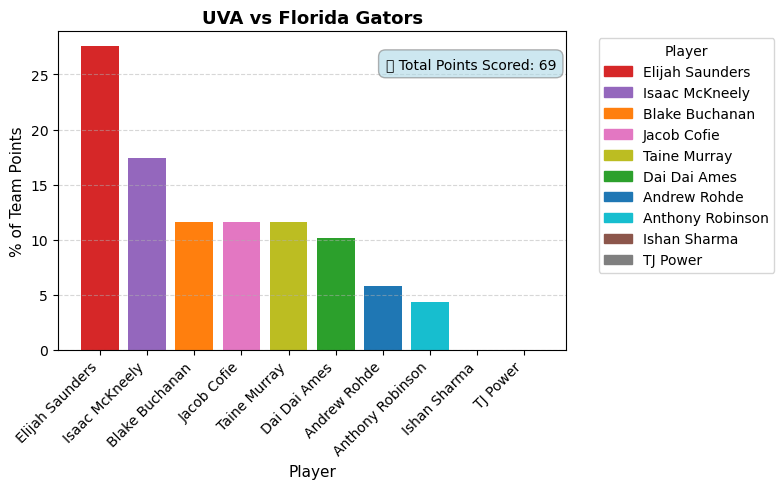

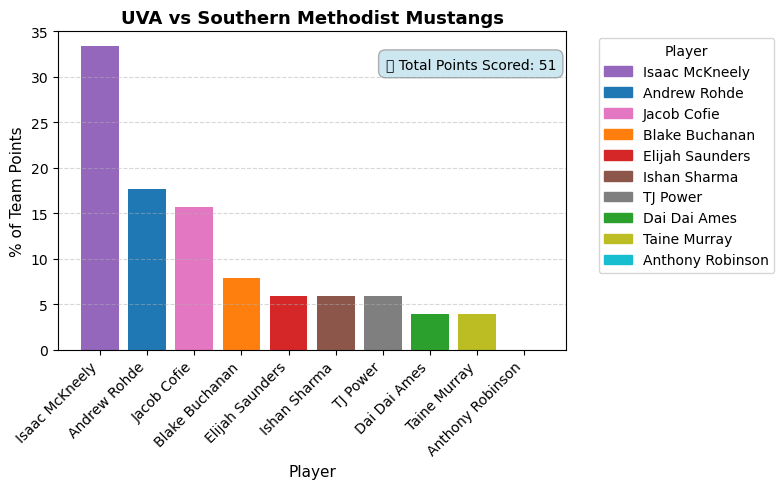

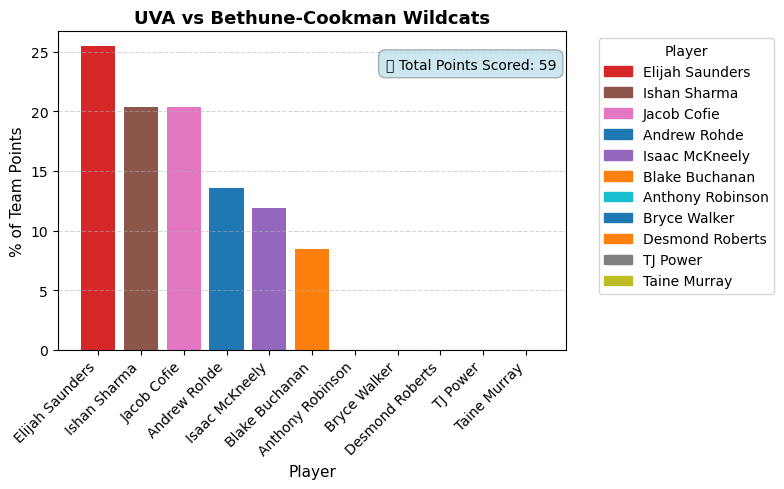

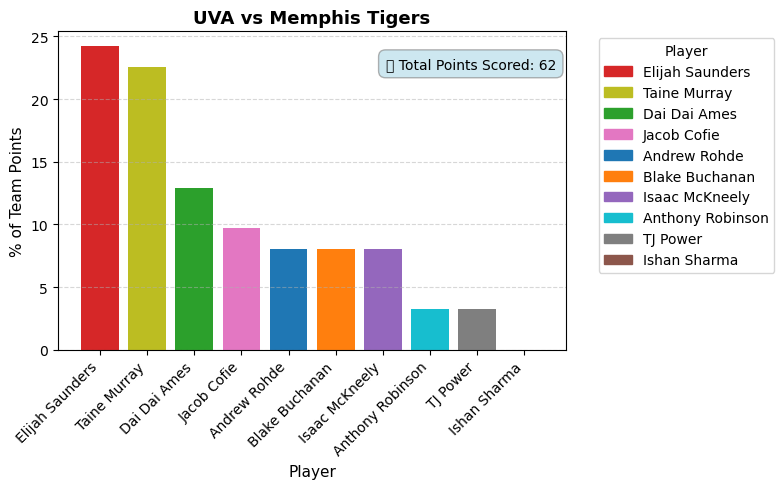

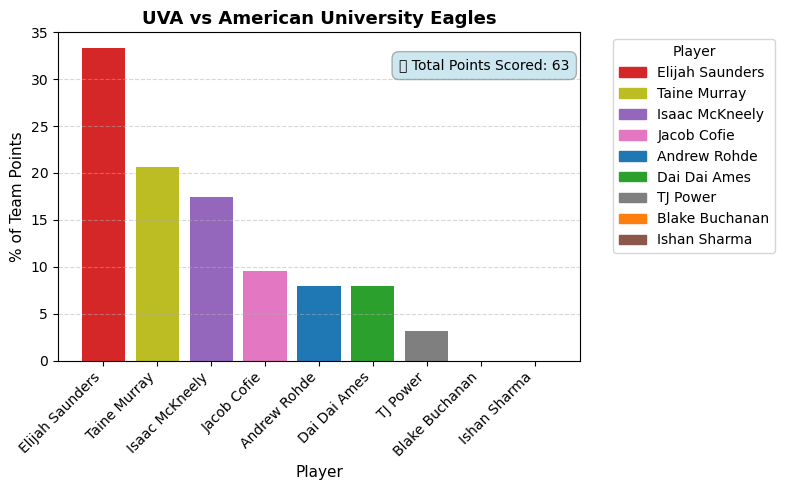

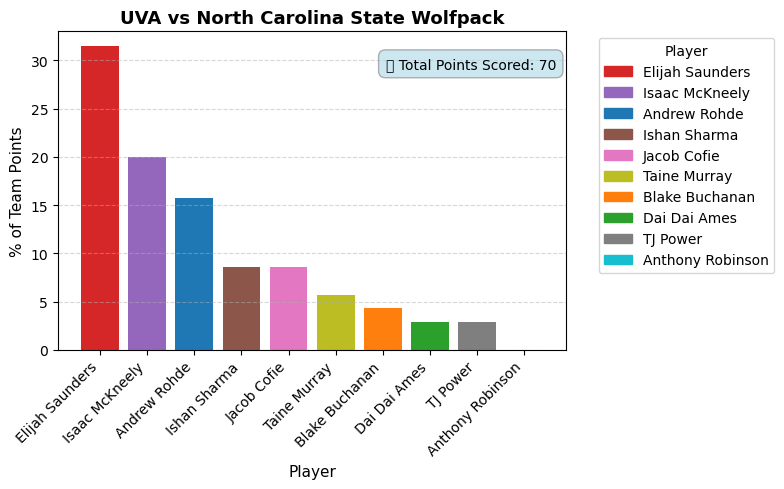

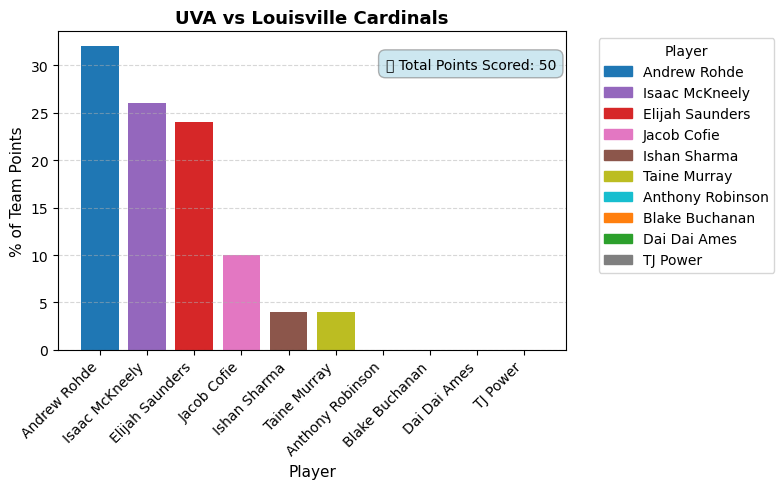

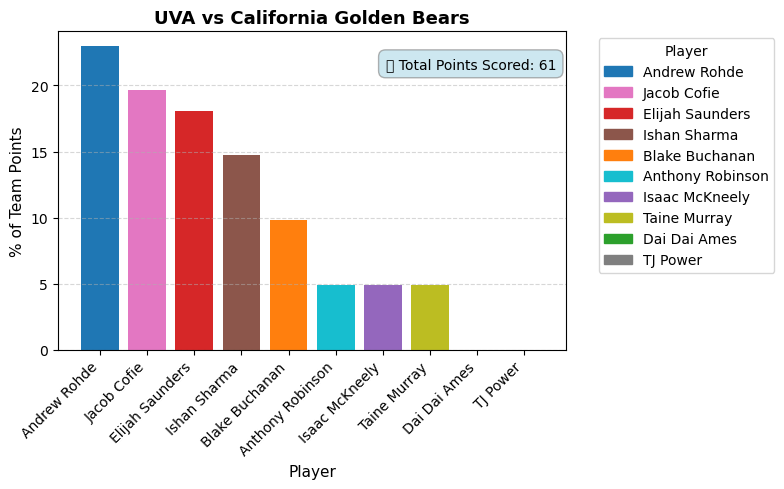

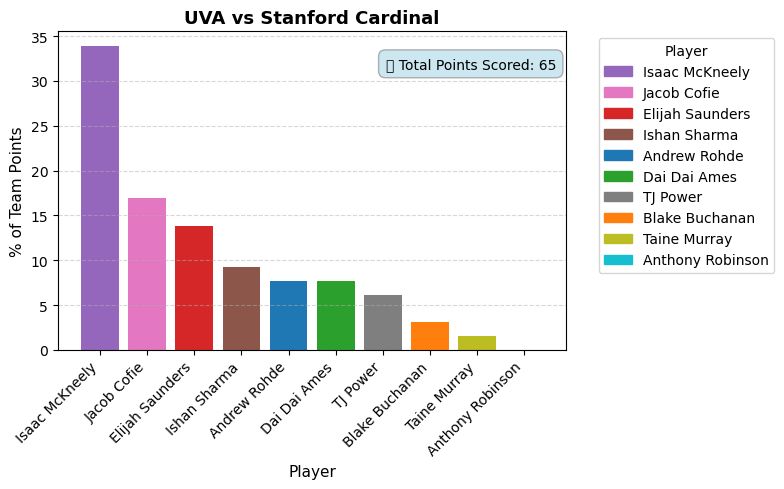

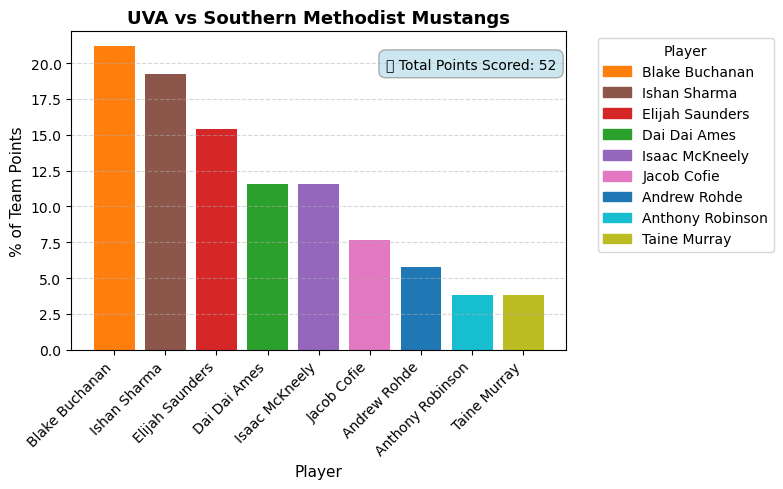

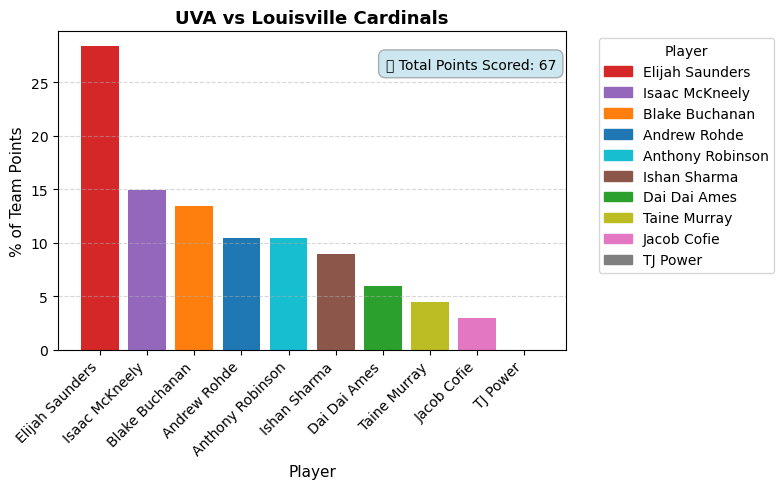

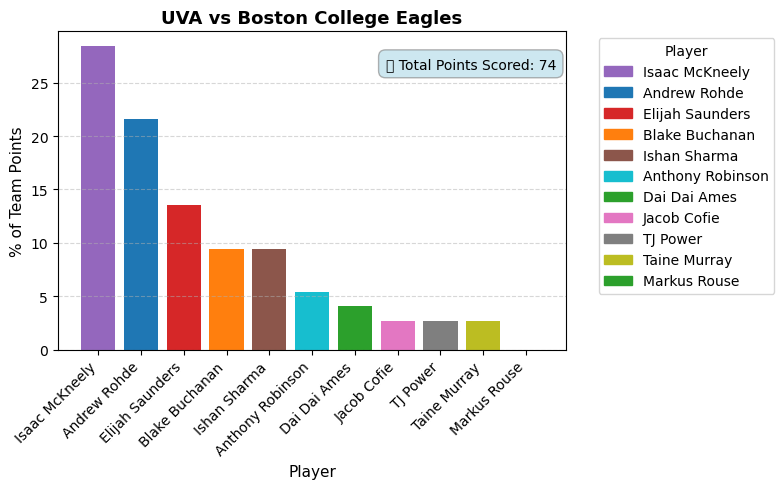

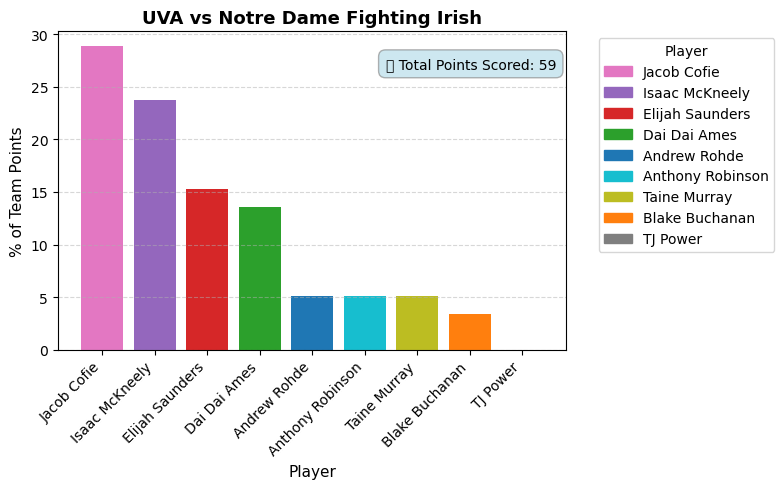

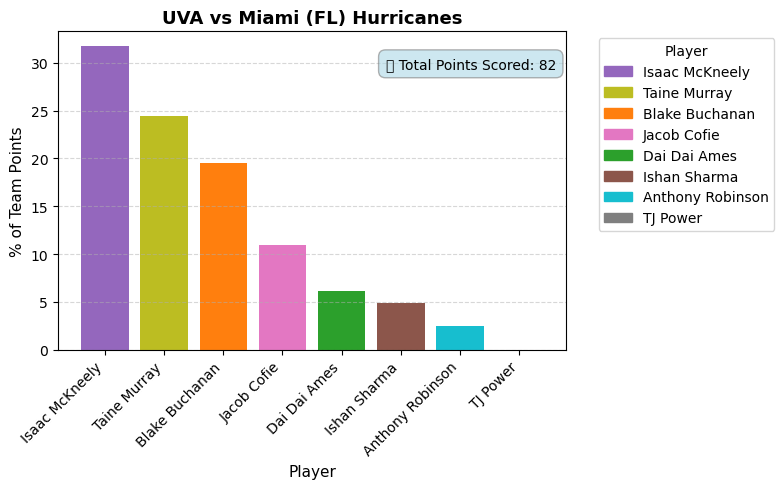

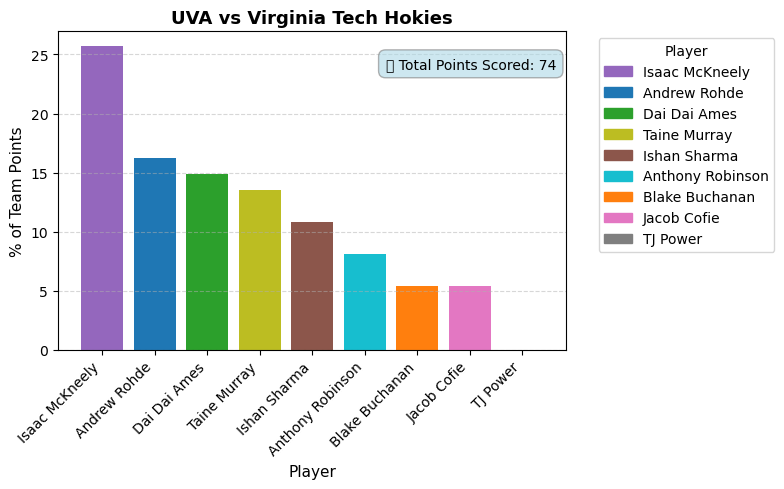

In [ ]:
# original graph

# Step 1: Load data
data = pd.read_csv(r"C:\Users\elean\OneDrive - University of Virginia\Documents\DS 2003\HWSept30\uva_stats_DS2003.csv")
data["GAMEDATE"] = pd.to_datetime(data["GAMEDATE"])

# Step 2: Calculate total team points per game
team_points = data.groupby("GAMEDATE")["POINTS"].sum().reset_index()
team_points = team_points.rename(columns={"POINTS": "TEAM_POINTS"})

# Step 3: Merge totals into player-level data
data = data.merge(team_points, on="GAMEDATE")

# Step 4: Calculate each player's percentage of team points for that game
data["PCT_TEAM_POINTS"] = (data["POINTS"] / data["TEAM_POINTS"]) * 100

# Step 5: Assign a unique color to each player
players = data["PLAYER"].unique()
colors = plt.cm.tab10.colors  # 10 distinct colors
player_colors = {player: colors[i % len(colors)] for i, player in enumerate(players)}

# Step 6: Create one chart per game
for date in sorted(data["GAMEDATE"].unique()):
    # Filter one game
    game_data = data[data["GAMEDATE"] == date].sort_values("PCT_TEAM_POINTS", ascending=False)
    
    # Get opponent name and team total points
    opponent_name = game_data["OPPONENT"].iloc[0]
    uva_total_points = int(game_data["TEAM_POINTS"].iloc[0])

    # Get colors for each player
    bar_colors = [player_colors[player] for player in game_data["PLAYER"]]

    # Step 7: Create the bar chart
    plt.figure(figsize=(8, 5))
    plt.bar(game_data["PLAYER"], game_data["PCT_TEAM_POINTS"], color=bar_colors)

    # Step 8: Add title and labels
    plt.title(f"UVA vs {opponent_name}", fontsize=13, fontweight="bold")
    plt.xlabel("Player", fontsize=11)
    plt.ylabel("% of Team Points", fontsize=11)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.5)

    # Step 9: Add total points box
    plt.text(
        0.98, 0.92,
        f"🏀 Total Points Scored: {uva_total_points}",
        fontsize=10,
        transform=plt.gca().transAxes,
        ha="right", va="top",
        bbox=dict(facecolor="lightblue", alpha=0.6, edgecolor="gray", boxstyle="round,pad=0.5")
    )

    # Step 10: Add a color legend (key) once per chart
    handles = [plt.Rectangle((0, 0), 1, 1, color=player_colors[p]) for p in game_data["PLAYER"]]
    plt.legend(handles, game_data["PLAYER"], bbox_to_anchor=(1.05, 1), loc="upper left", title="Player")

    plt.tight_layout()
    plt.show()


### Feedback and Improvements

**Feedback Source:**  
Peer and instructor review during class.

**Feedback Summary and Adjustments Made:**

1. **Add Data Labels to Bars**  
   - Added value labels showing each player’s % of total team points on every bar.

2. **Use More Contrasting Colors**  
   - Changed from `tab10` to `tab20` color palette to make each player’s bar visually distinct.

3. **Add Grid Lines**  
   - Added light dashed grid lines along the x-axis to make differences between players easier to compare.

4. **Switch to Horizontal Bars for Clarity**  
   - Rotated the chart to use horizontal bars so player names and value labels are easier to read and less cluttered.


C:\Users\elean\AppData\Local\Temp\ipykernel_2704\2536054178.py:72: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\elean\anaconda3\envs\3.12.7-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


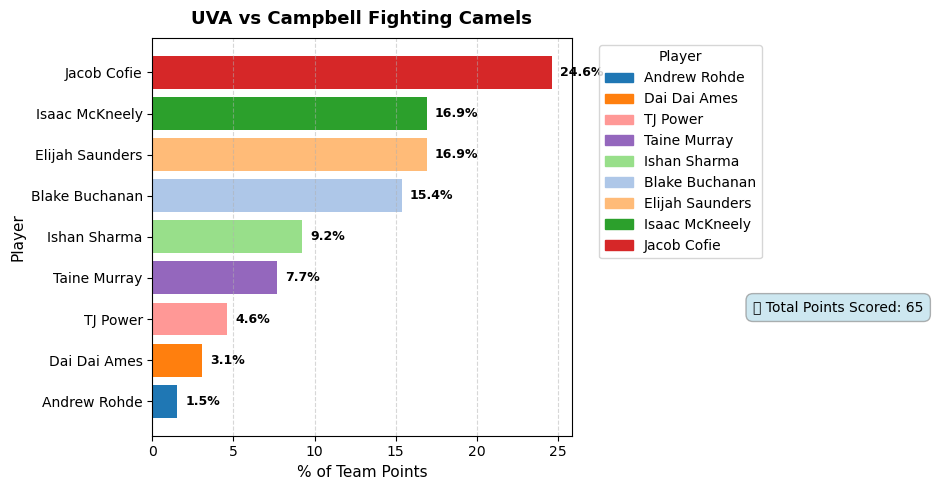

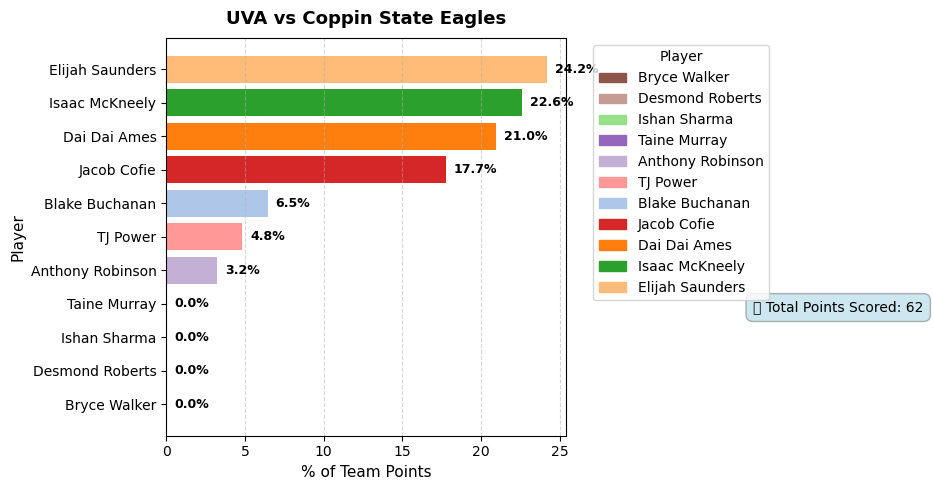

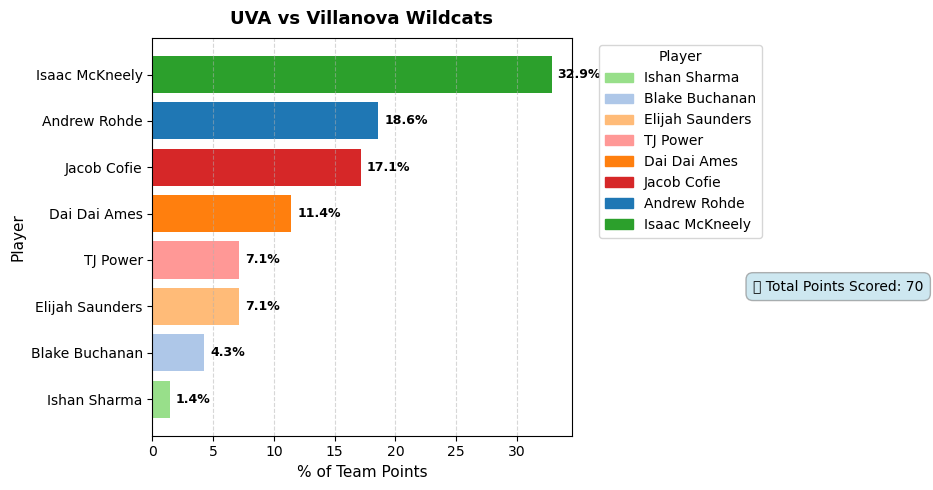

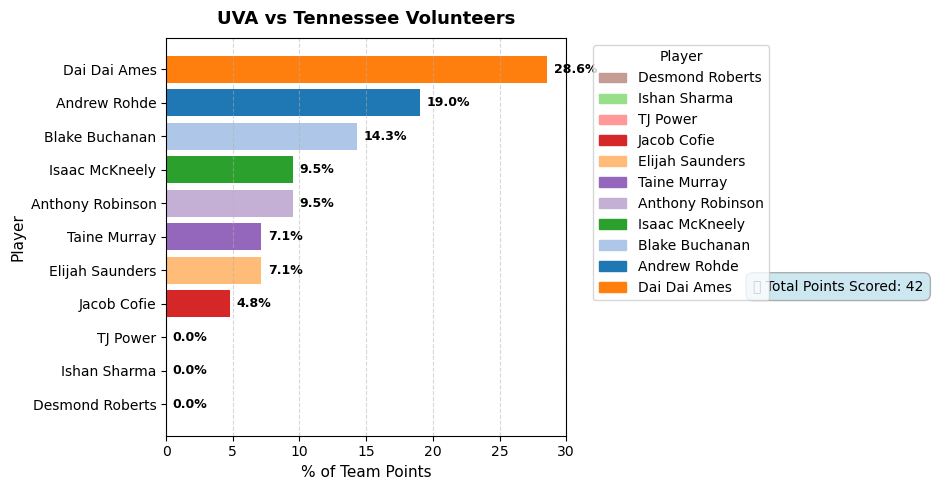

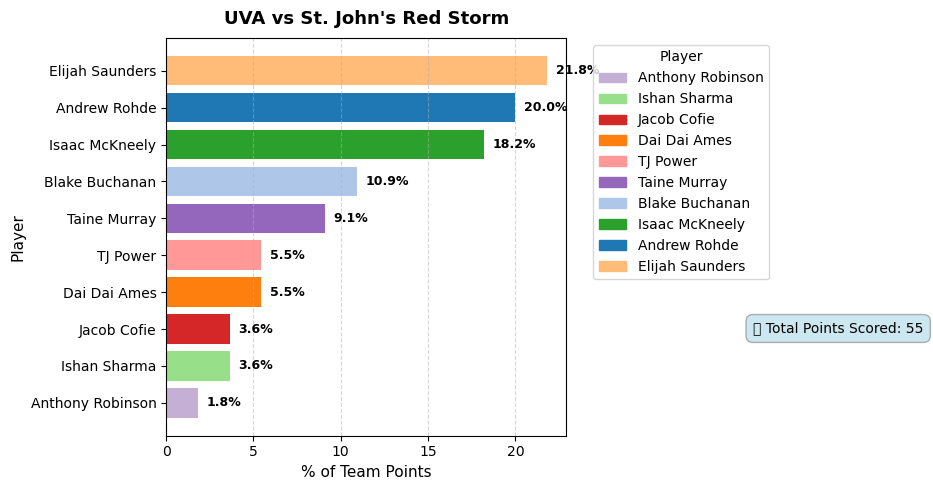

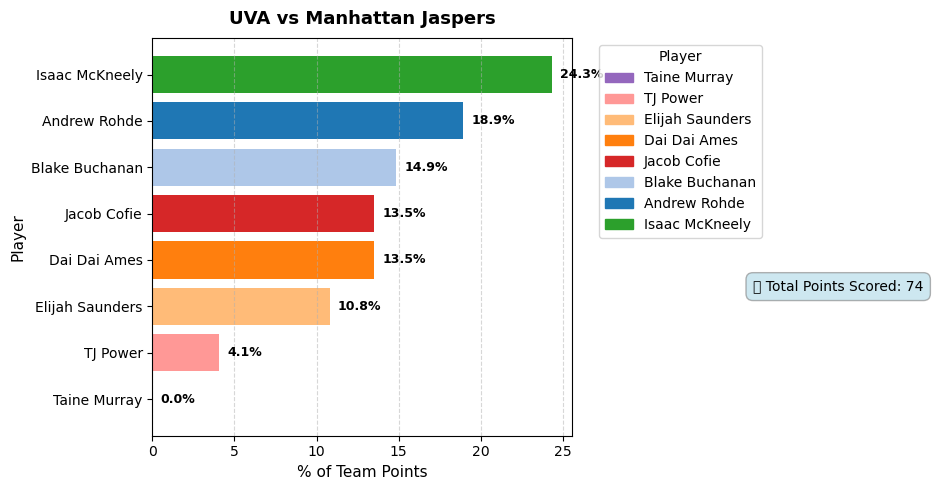

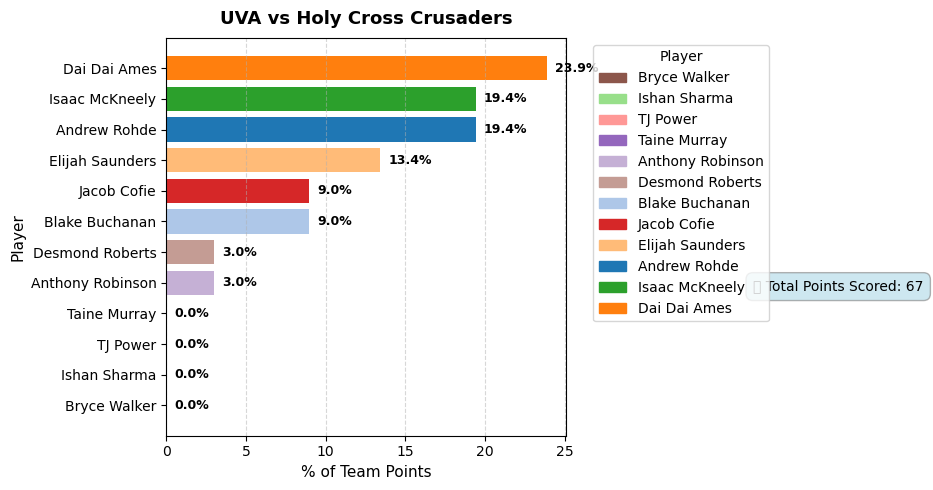

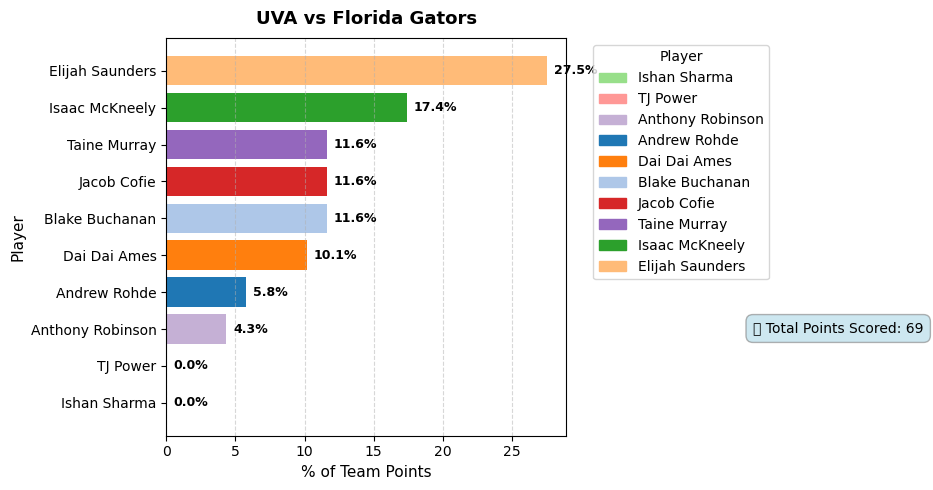

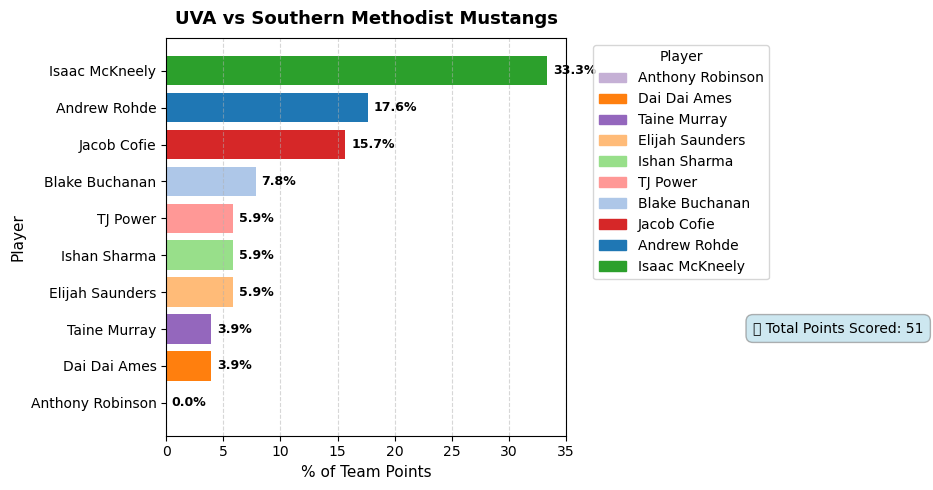

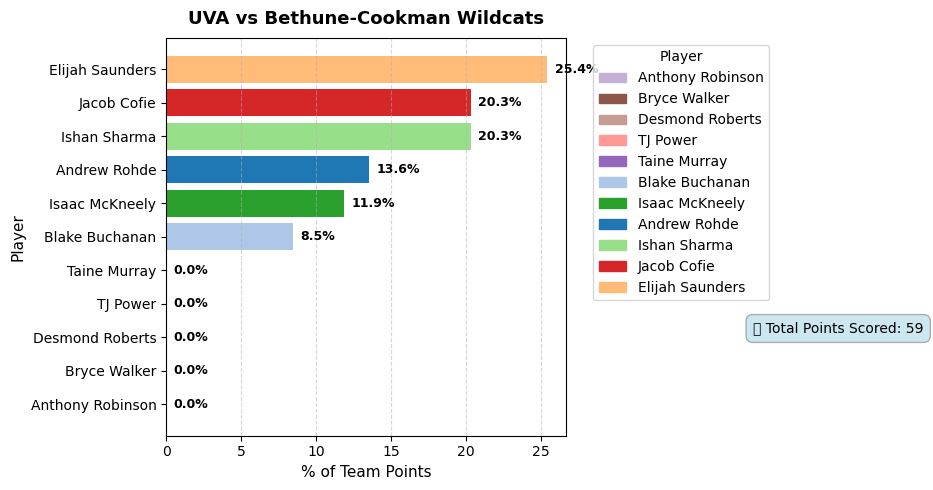

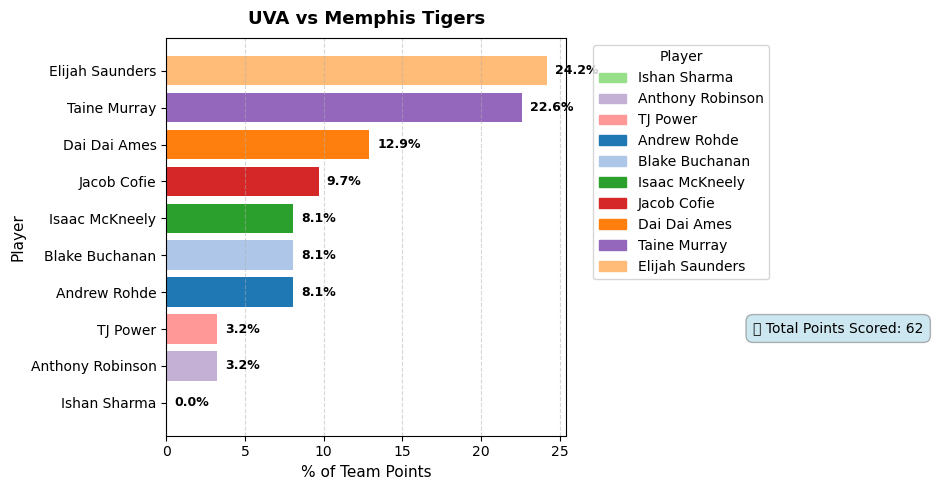

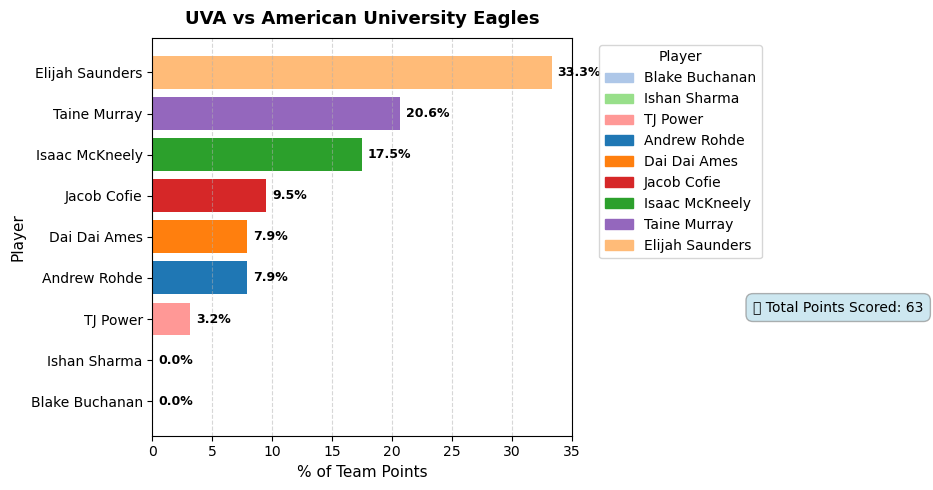

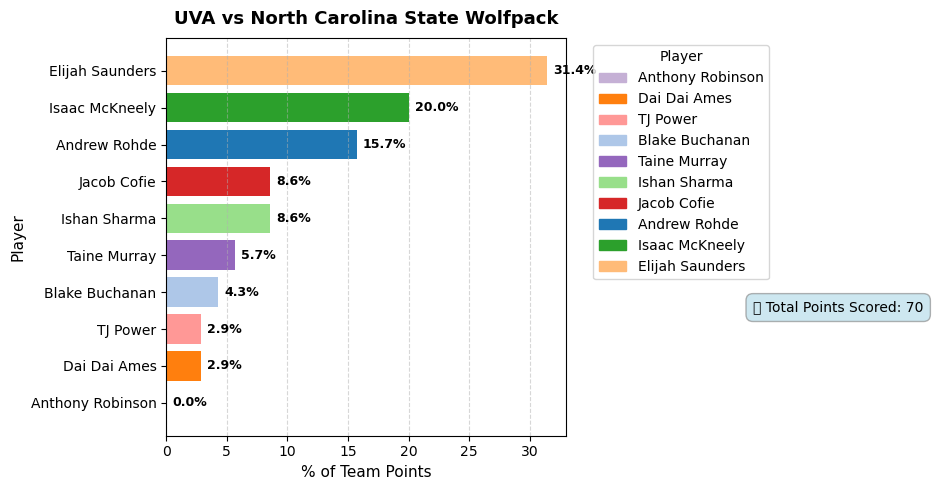

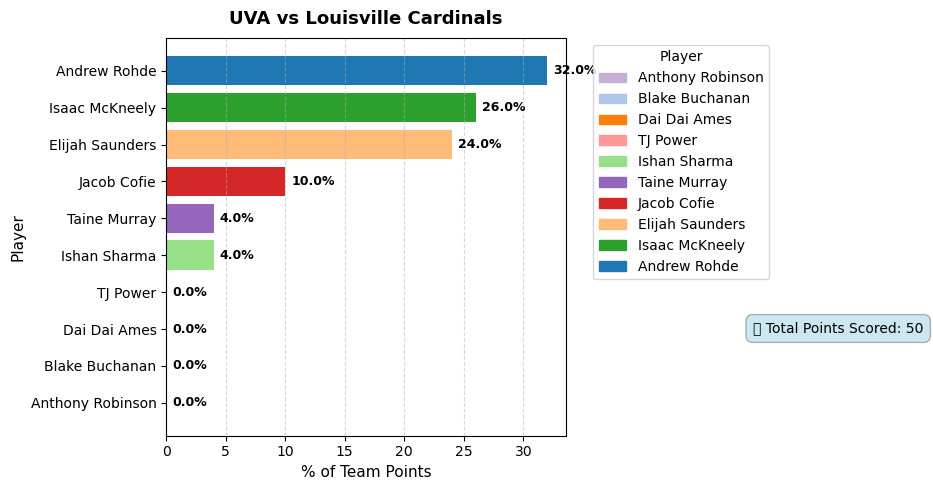

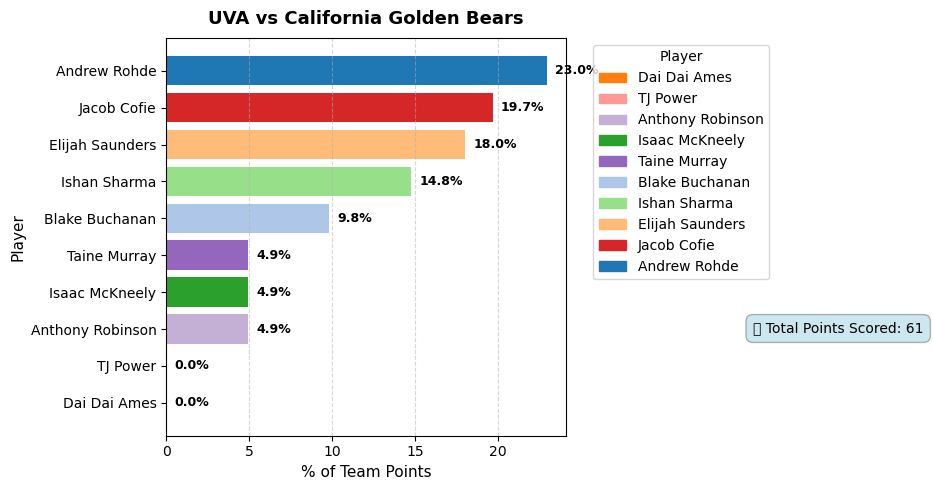

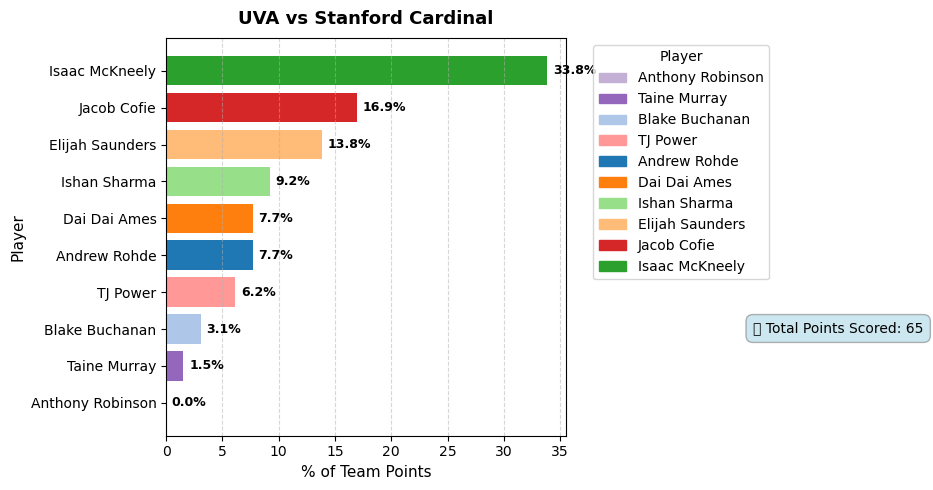

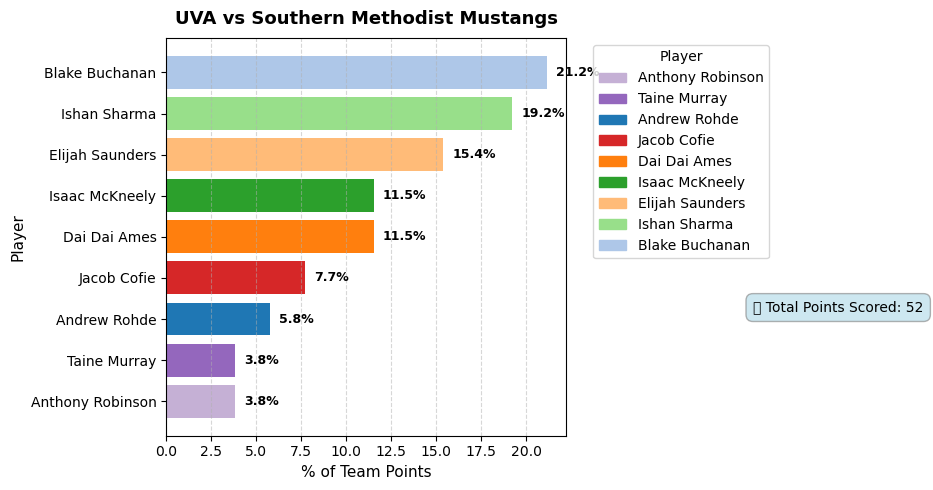

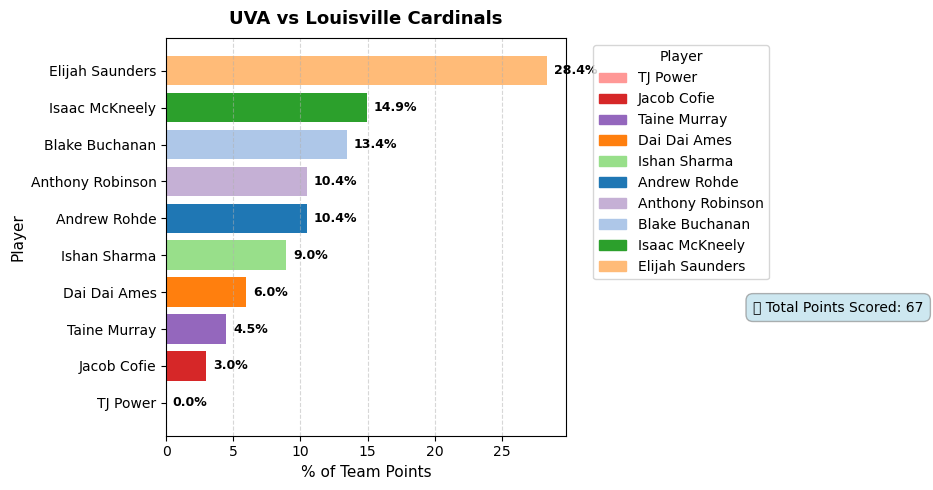

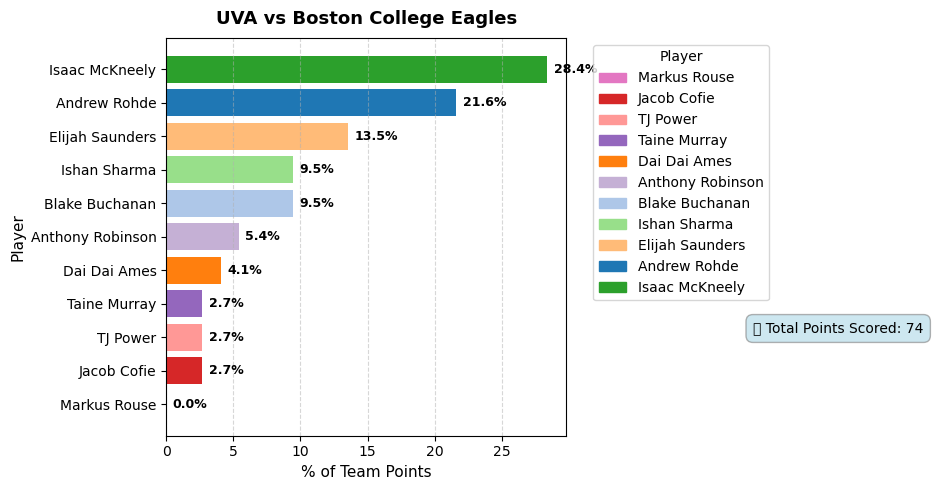

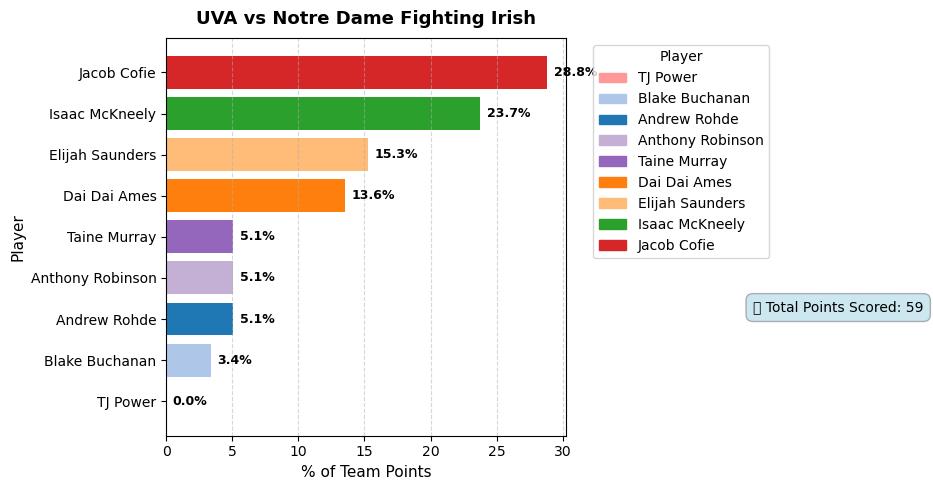

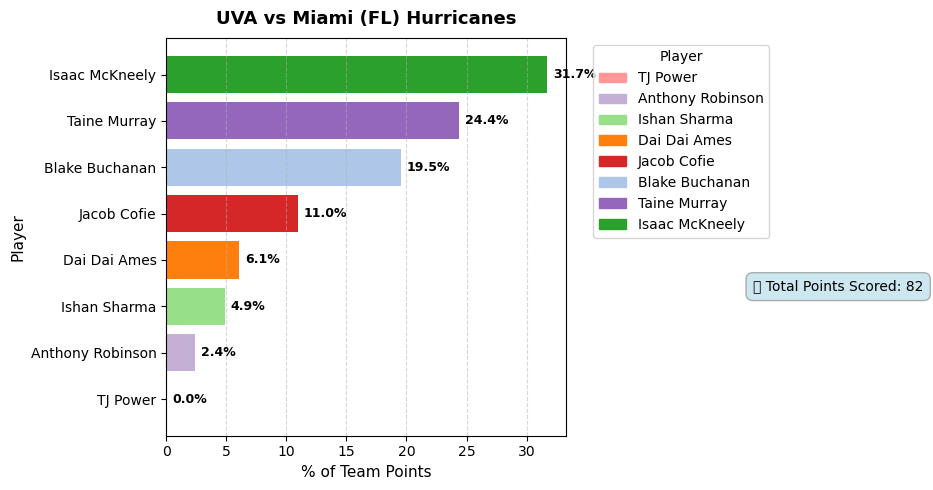

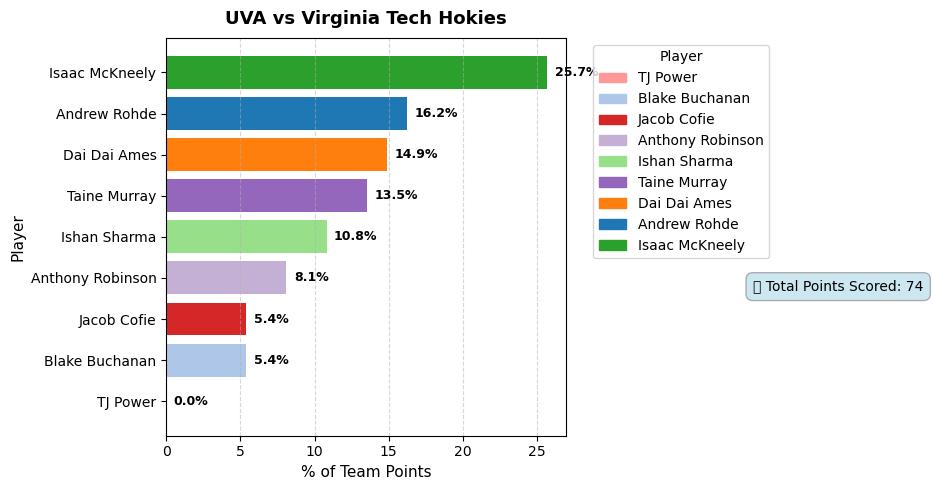

In [21]:
# Step 1: Load data
data = pd.read_csv(r"C:\Users\elean\OneDrive - University of Virginia\Documents\DS 2003\HWSept30\uva_stats_DS2003.csv")
data["GAMEDATE"] = pd.to_datetime(data["GAMEDATE"])

# Step 2: Calculate total team points per game
team_points = data.groupby("GAMEDATE")["POINTS"].sum().reset_index()
team_points = team_points.rename(columns={"POINTS": "TEAM_POINTS"})

# Step 3: Merge totals into player-level data
data = data.merge(team_points, on="GAMEDATE")

# Step 4: Calculate each player's percentage of team points for that game
data["PCT_TEAM_POINTS"] = (data["POINTS"] / data["TEAM_POINTS"]) * 100

# Step 5: Assign a unique color to each player (using a more contrasting palette)
players = data["PLAYER"].unique()
colors = plt.cm.tab20.colors  # 20 distinct colors (higher contrast)
player_colors = {player: colors[i % len(colors)] for i, player in enumerate(players)}

# Step 6: Create one improved chart per game
for date in sorted(data["GAMEDATE"].unique()):
    # Filter one game
    game_data = data[data["GAMEDATE"] == date].sort_values("PCT_TEAM_POINTS", ascending=True)  # ascending for horizontal bars
    
    # Get opponent name and team total points
    opponent_name = game_data["OPPONENT"].iloc[0]
    uva_total_points = int(game_data["TEAM_POINTS"].iloc[0])

    # Get colors for each player
    bar_colors = [player_colors[player] for player in game_data["PLAYER"]]

    # Step 7: Create a horizontal bar chart
    plt.figure(figsize=(8, 5))
    bars = plt.barh(game_data["PLAYER"], game_data["PCT_TEAM_POINTS"], color=bar_colors)

    # Step 8: Add title and axis labels
    plt.title(f"UVA vs {opponent_name}", fontsize=13, fontweight="bold", pad=10)
    plt.xlabel("% of Team Points", fontsize=11)
    plt.ylabel("Player", fontsize=11)
    plt.grid(axis="x", linestyle="--", alpha=0.5)

    # Step 9: Add total points box directly UNDER the legend
    legend = plt.legend(handles, game_data["PLAYER"], bbox_to_anchor=(1.05, 1), loc="upper left", title="Player")

    # Get the bounding box of the legend (to place the total points box right below it)
    plt.draw()  # ensures legend is rendered so its box has coordinates
    legend_box = legend.get_window_extent(plt.gcf().canvas.get_renderer())

    # Convert legend box coordinates (in pixels) to figure coordinates
    inv = plt.gcf().transFigure.inverted()
    legend_coords = inv.transform([(legend_box.x0, legend_box.y0)])

    # Place the total points box slightly below the legend
    plt.text(
        legend_coords[0][0], legend_coords[0][1] - 0.05,  # small downward offset
        f"🏀 Total Points Scored: {uva_total_points}",
        fontsize=10,
        transform=plt.gcf().transFigure,
        ha="left", va="top",
        bbox=dict(facecolor="lightblue", alpha=0.6, edgecolor="gray", boxstyle="round,pad=0.5")
    ) 

    # Step 10: Add numeric labels at the end of each bar
    for bar, value in zip(bars, game_data["PCT_TEAM_POINTS"]):
        plt.text(value + 0.5, bar.get_y() + bar.get_height()/2,
                 f"{value:.1f}%", va='center', ha='left', fontsize=9, color='black', fontweight="bold")

    # Step 11: Add a color legend (key)
    handles = [plt.Rectangle((0, 0), 1, 1, color=player_colors[p]) for p in game_data["PLAYER"]]
    plt.legend(handles, game_data["PLAYER"], bbox_to_anchor=(1.05, 1), loc="upper left", title="Player")

    plt.tight_layout()
    plt.show()
